## Análisis exploratorio de datos

Se cargan las librerías.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

Se cargan los datos.

In [3]:
segmentos = []

# Leer los archivos CSV segmentados y almacenarlos en la lista
for i in range(0,4):
    segmento = pd.read_csv(f'../data/raw/segmento_{i+1}.csv')
    segmentos.append(segmento)
# Concatenar los DataFrames de los segmentos en uno solo
df1 = pd.concat(segmentos, ignore_index=True)

Se analizan los datos.

In [4]:
df1.head()

trans_date_trans_time            cc_num                            merchant   
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann  \
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender   
0       misc_net    4.97   Jennifer    Banks      F  \
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long   
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781  \
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob   
0      3495          Psychologist, counselling  1988-03-09  \
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long   
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315  \
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
df1.describe()

cc_num           amt           zip           lat          long   
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  \
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [8]:
df1["is_fraud"].value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

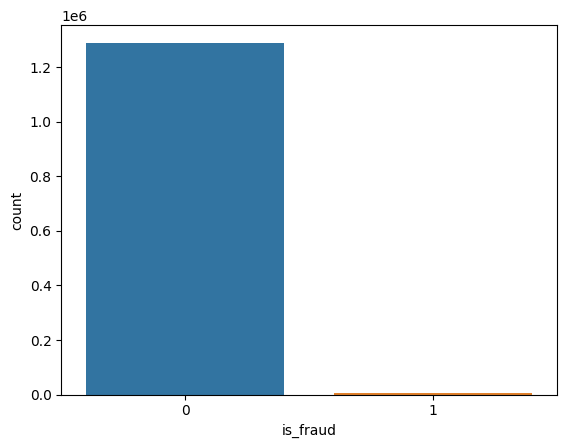

In [29]:
sns.countplot(x=df1["is_fraud"]);

In [50]:
for column in df1.columns:
    print(f"Columna: {column}")
    print(df1[column].nunique())
    print("-------------------------------")

Columna: trans_date_trans_time
1274791
-------------------------------
Columna: cc_num
983
-------------------------------
Columna: merchant
693
-------------------------------
Columna: category
14
-------------------------------
Columna: amt
52928
-------------------------------
Columna: first
352
-------------------------------
Columna: last
481
-------------------------------
Columna: gender
2
-------------------------------
Columna: street
983
-------------------------------
Columna: city
894
-------------------------------
Columna: state
51
-------------------------------
Columna: zip
970
-------------------------------
Columna: lat
968
-------------------------------
Columna: long
969
-------------------------------
Columna: city_pop
879
-------------------------------
Columna: job
494
-------------------------------
Columna: dob
968
-------------------------------
Columna: trans_num
1296675
-------------------------------
Columna: unix_time
1274823
------------------------------

Se puede ver que hay muchas variables no numéricas y sobre todo que se trata de un problema muy desbalanceado, donde la clase minoritaría está presente en menos del 0.6 de los casos.

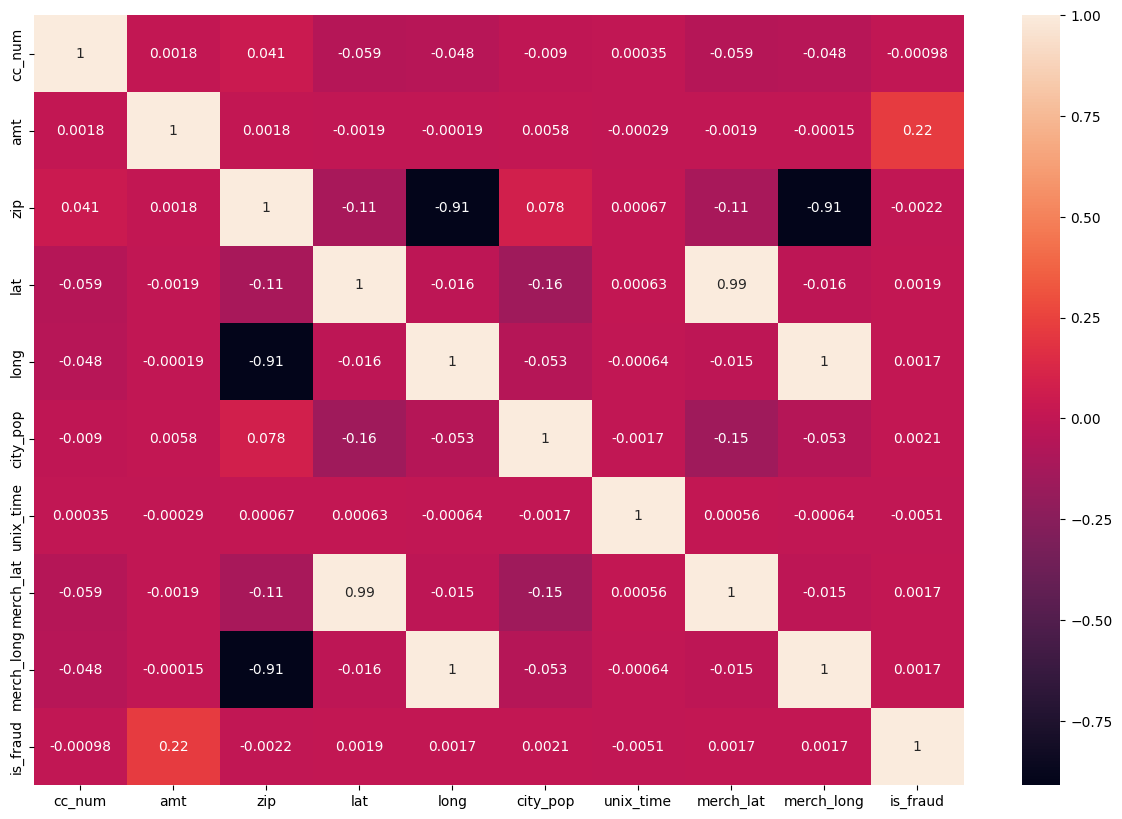

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(numeric_only=True), annot=True);

Apenas se observan correlaciones entre la variable target y demás columnas numéricas del Dataframe original. La más fuerte sería la columna amt (cantidad de dinero).

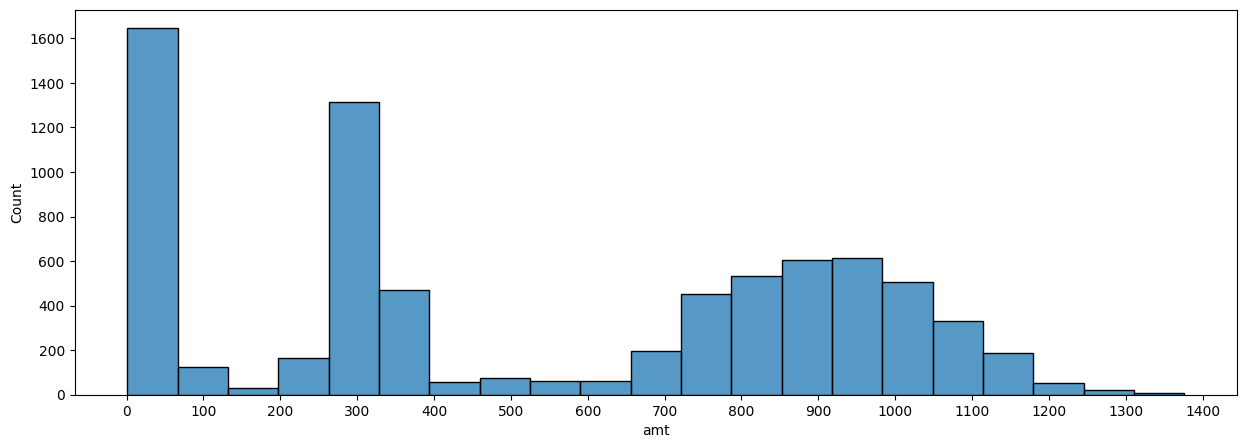

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(df1[df1["is_fraud"] == 1]["amt"])
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400]);

Se puede ver que el fraude se concentra en valores por debajo de 100 euros y también en torno a 300 euros.

A continuación, se visualizan en dos mapas los puntos donde se concentran las personas que cometen fraude y los comercios en los que se cometen dichos fraudes.

In [43]:
fraud_data = df1[df1['is_fraud'] == 1]  # Datos de fraudes

In [44]:
# Crea un objeto de mapa centrado en una ubicación inicial
fraud_map = folium.Map(location=[fraud_data['lat'].mean(), fraud_data['long'].mean()], zoom_start=10)

# Crea un grupo de marcadores para las ubicaciones de fraude
fraud_markers = MarkerCluster().add_to(fraud_map)

# Agrega marcadores para cada ubicación de fraude al grupo de marcadores
for index, row in fraud_data.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(fraud_markers)

# Muestra el mapa
fraud_map

In [45]:
# Crea un mapa para ubicaciones de comercios
merchant_map = folium.Map(location=[fraud_data['merch_lat'].mean(), fraud_data['merch_long'].mean()], zoom_start=10)

# Crea un grupo de marcadores para las ubicaciones de comercios
merchant_markers = MarkerCluster().add_to(merchant_map)

# Agrega marcadores para cada ubicación de comercio al grupo de marcadores
for index, row in fraud_data.iterrows():
    folium.Marker([row['merch_lat'], row['merch_long']]).add_to(merchant_markers)

# Muestra el mapa
merchant_map

Puesto que hay bastantes más ejemplos de la clase mayoritaría, se eliminan registros de dicha clase hasta igualarlos con la clase minoritaría, para que en las gráficas la clase minoritaría no quede difuminada y se puedan observar las variaciones de ambas.

In [47]:
counts = df1['is_fraud'].value_counts()

# Encuentra la clase con el menor número de instancias
minority_class = counts.idxmin()

# Filtra el DataFrame para obtener solo instancias de la clase minoritaria
minority_df = df1[df1['is_fraud'] == minority_class]

# Obtiene una muestra aleatoria de la clase mayoritaria del mismo tamaño que la clase minoritaria
majority_df = df1[df1['is_fraud'] != minority_class].sample(n=len(minority_df), random_state=42)

# Combina los DataFrames de la clase minoritaria y la muestra de la clase mayoritaria
undersampled_df = pd.concat([minority_df, majority_df])

# Mezcla aleatoriamente las instancias en el DataFrame resultante
df_balanced= undersampled_df.sample(frac=1, random_state=42)

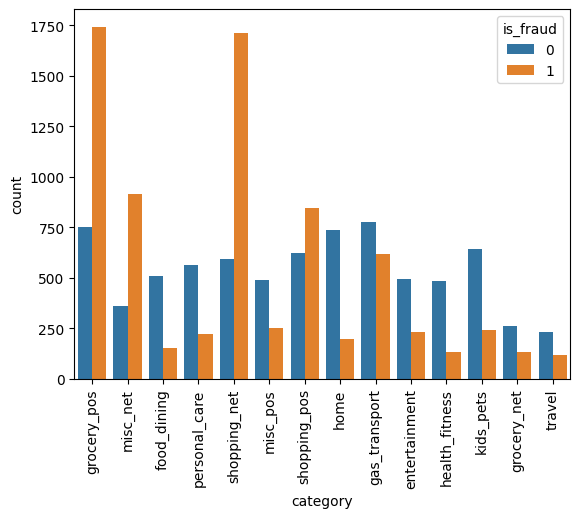

In [51]:
sns.countplot(x="category", hue="is_fraud", data=df_balanced)
plt.xticks(rotation=90);

Se observa que hay ciertas categorías de comercios en las que el fraude se dispara.

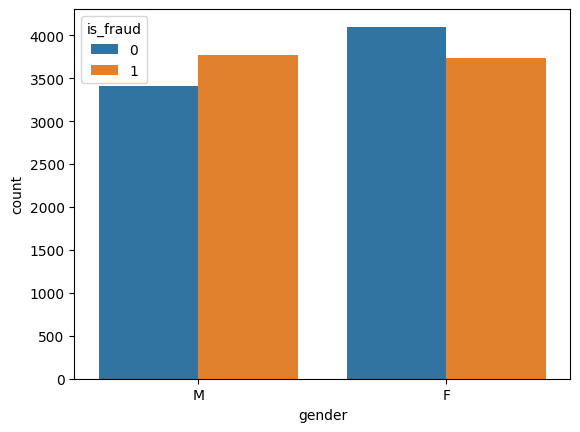

In [52]:
sns.countplot(x="gender", hue="is_fraud", data=df_balanced);

No hay una clara distinción en cuanto al fraude por género. Esta variable no la tendremos en cuenta, así evitamos también discriminación por género.

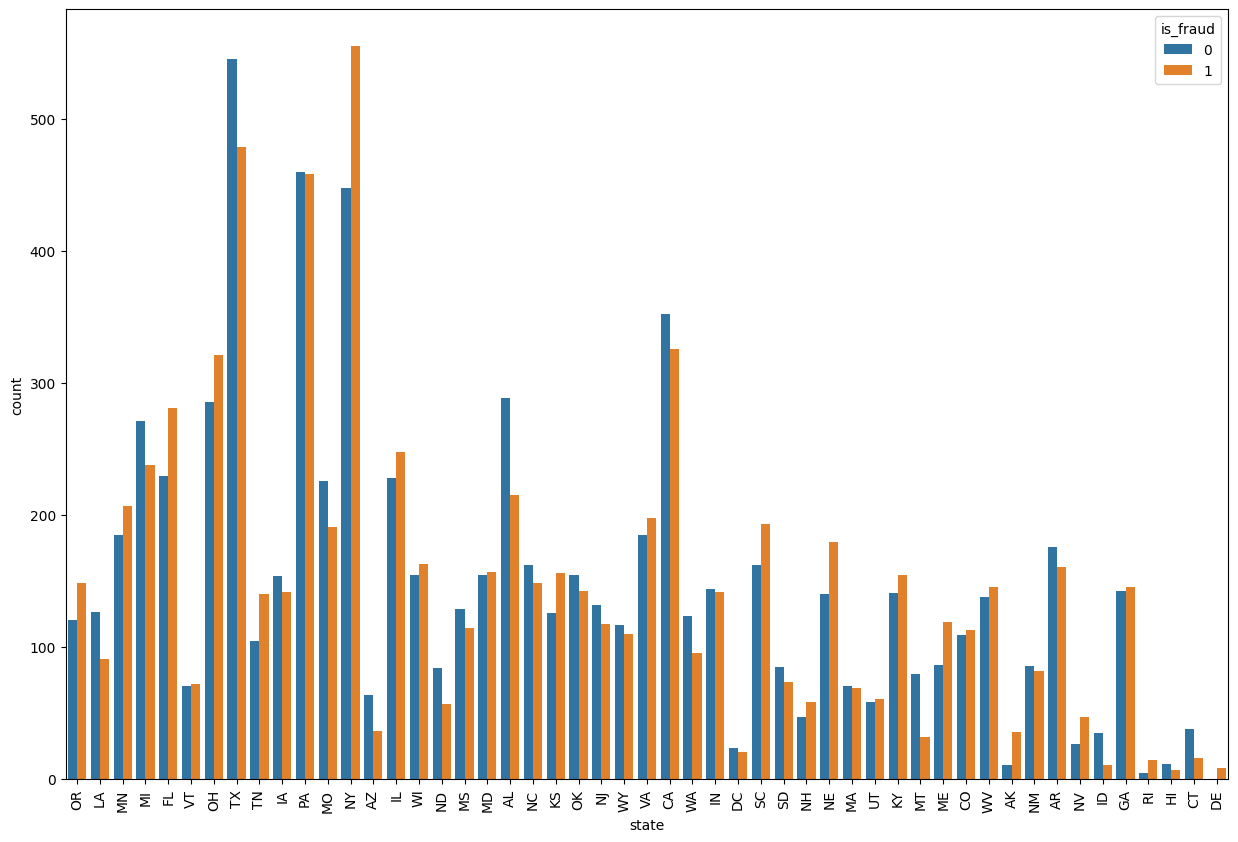

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x="state", hue="is_fraud", data=df_balanced)
plt.xticks(rotation=90);

Se observa que en ciertos estados hay una tasa de fraude mucho mayor que en otros.